In [1]:
from set_3_functions import *

set_3_files = [file for file in get_files("data/set_3")]

two_hundred_byte_files = [file for file in set_3_files if '200_bytes' in file]
three_hundred_byte_files = [file for file in set_3_files if '300_bytes' in file]
five_hundred_byte_files = [file for file in set_3_files if '500_bytes' in file]

two_hundred_byte_average_latencies_files = [file for file in two_hundred_byte_files if 'average' in file and 'latencies' in file]
three_hundred_byte_average_latencies_files = [file for file in three_hundred_byte_files if 'average' in file and 'latencies' in file]
five_hundred_byte_average_latencies_files = [file for file in five_hundred_byte_files if 'average' in file and 'latencies' in file]

# Set 3 DDOS Analysis

This set contains data collected when DDS is under a DDOS cyberattack.

In these tests imposter participants overload the network and saturate the throughput with large amounts of data. As usual, there is a `unicast` and `multicast` variation of these tests. So far I have run tests where the malicious participants exchange data with sizes of 200 Bytes, 300 Bytes, and 500 Bytes. Each test varies the number of participants between 5, 25, and 50 non-malicious participants and 5, 25, and 50 malicious participants. 

So what are we interested in seeing? 

For each data size:
- Latency per participant amount
- Throughput per participant amount

Here is a table summarising the test configuration:

|             Parameter            |                                                Value                                               |
|:--------------------------------:|:--------------------------------------------------------------------------------------------------:|
|   Total Publishers/Subscribers   |                                             10, 50, 100                                            |
| Malicious Publishers/Subscribers |                                              5, 25, 50                                             |
|            Data Length           | 200 Bytes, 300 Bytes, 500 Bytes, 1 Kilobyte, 64 Kilobytes, 128 Kilobytes, 1 Megabyte, 64 Megabytes |
|           Test Duration          |                                             900 Seconds                                            |
|           Latency Count          |                                                1000                                                |
|       Communication Method       |                                        `unicast` `multicast`                                       |
|             Transport            |                                               `UDPv4`                                              |

## 200 Byte: Latency Analysis

Here we want to see how the performance of DDS under a DDOS attack differs to the non-attack case. We choose the test from `Set 2` with **50** total participants and compare this with the DDOS test with **100** total participants. This is the comparison because in both cases they have the same amount of non-malicious participants:

|                                      | Set 2     | Set 3     |
|--------------------------------------|-----------|-----------|
| Non-Malicious Participant Allocation | 25P + 25S | 25P + 25S |
| Malicious Participant Allocation     | 0P + 0S   | 25P + 25S |

Therefore, we start off by plotting the `Set 2` test latency.

### Set 2 50 Participant (0 Malicious, 100 Bytes) Latency VS Set 3 100 Participant (50 Malicious, 500 Bytes) Latency

Here we plot a figure showing the latency of the 50 participant test from `Set 2` on the left and a figure showing the latency of the 50 non-malicious participants from `Set 3` on the right. There will be two lines: the first representing the latency of the `unicast` test produced from the average of 3 runs, and the second representing the latency of the `multicast` test produced from the average of 3 runs too.

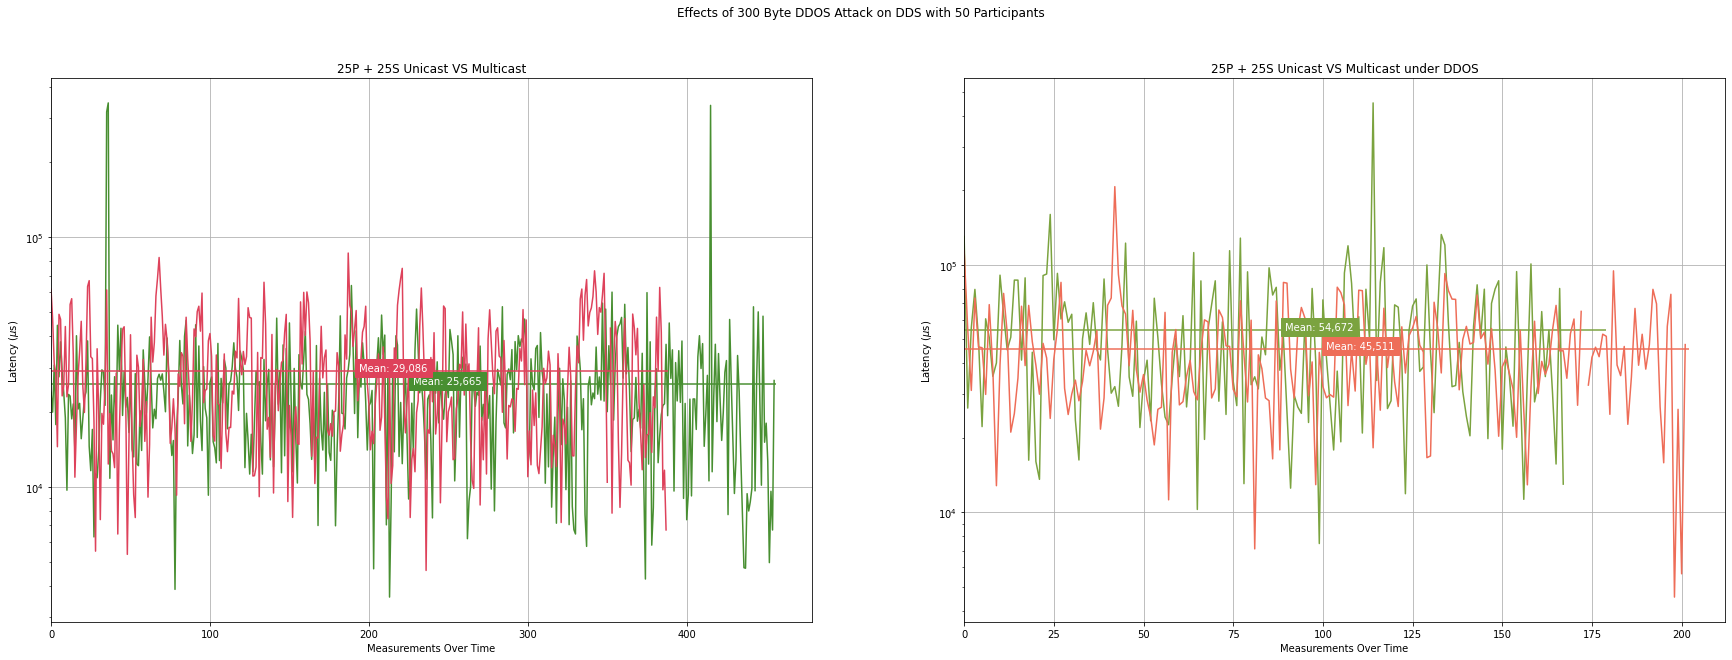

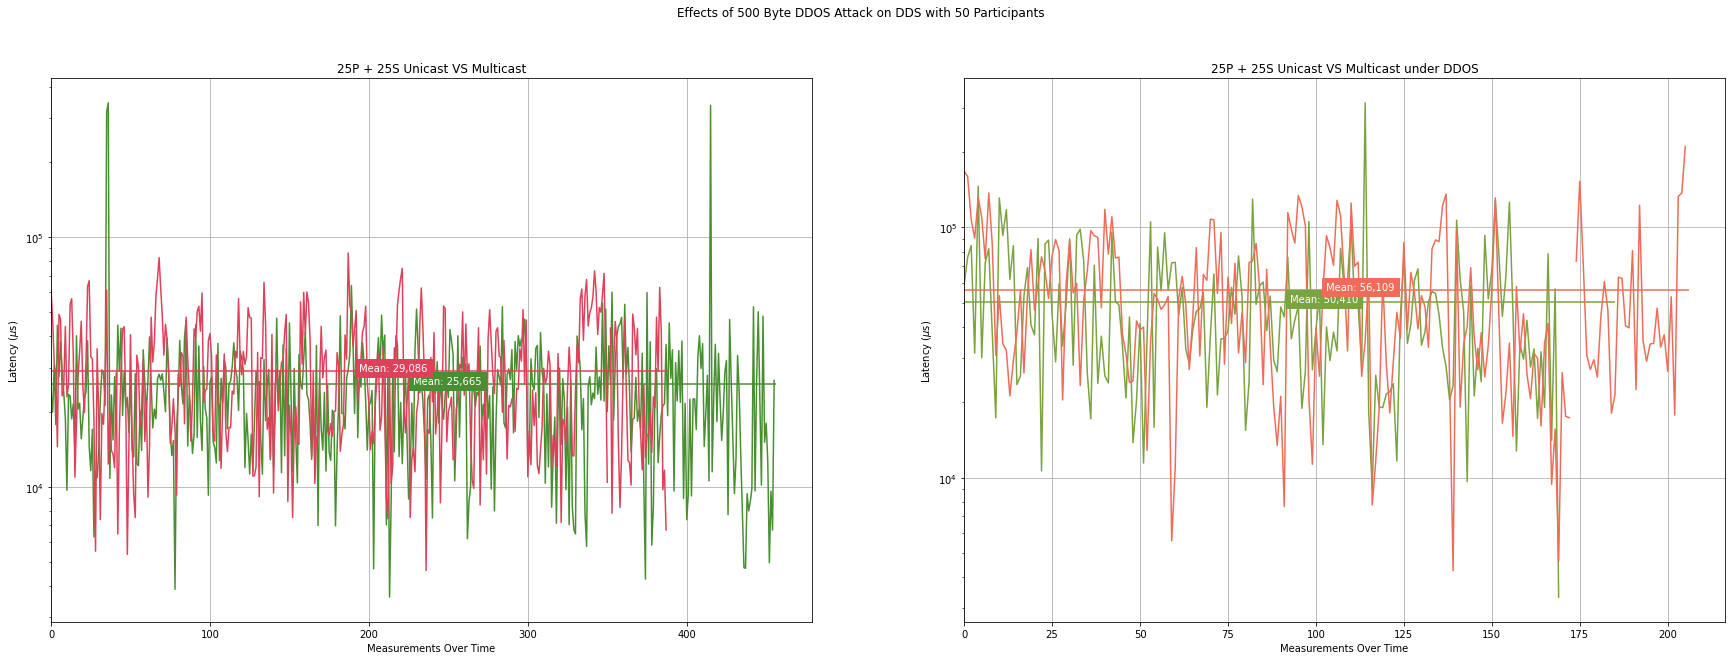

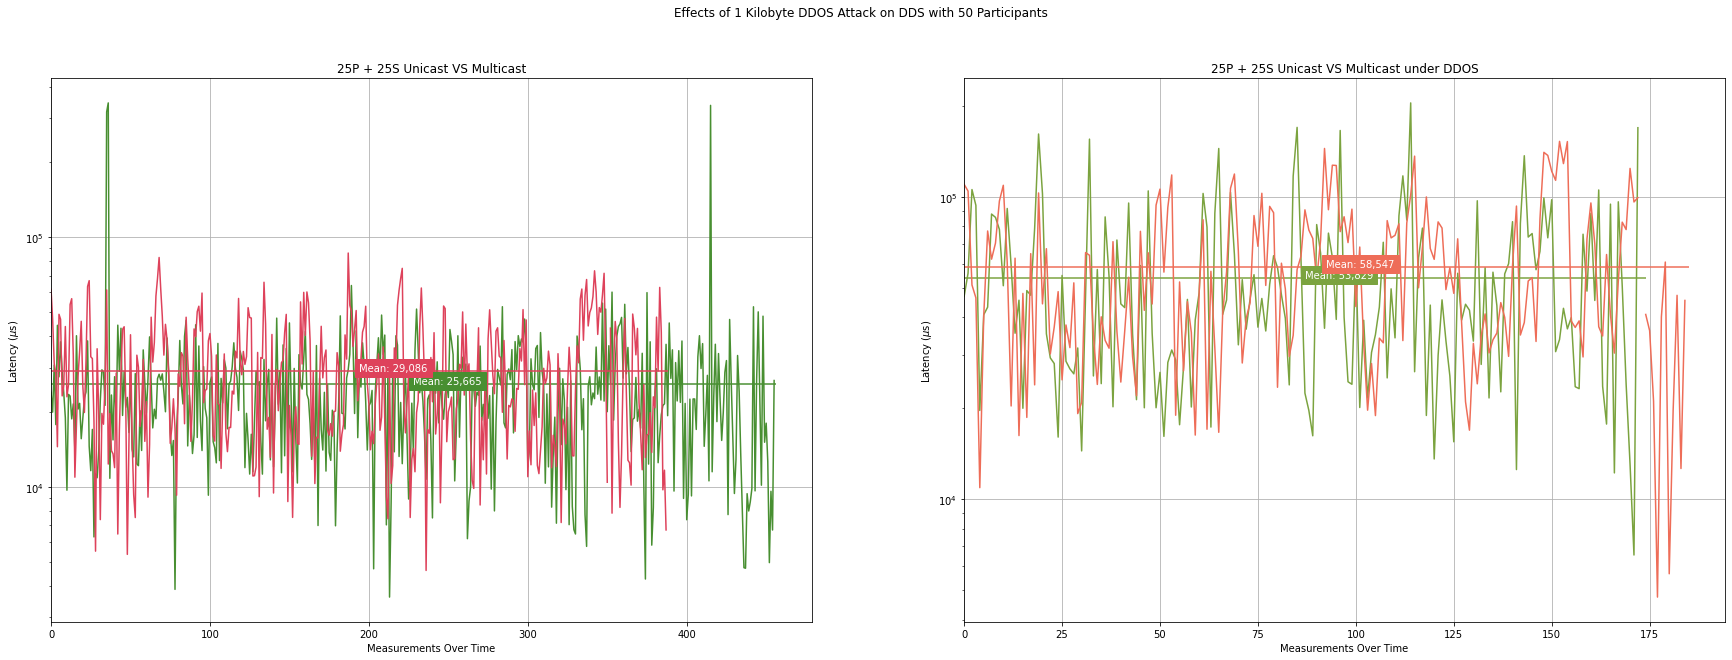

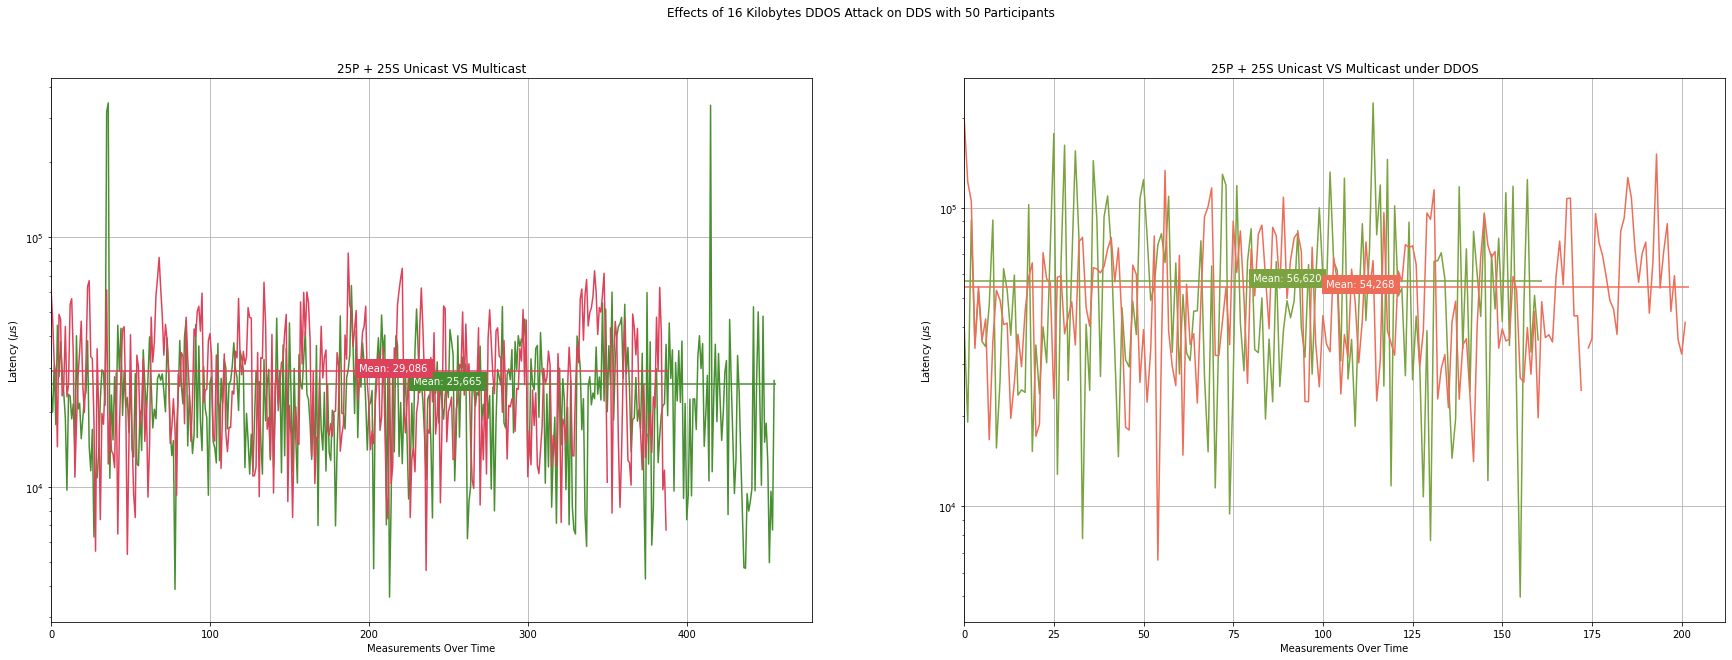

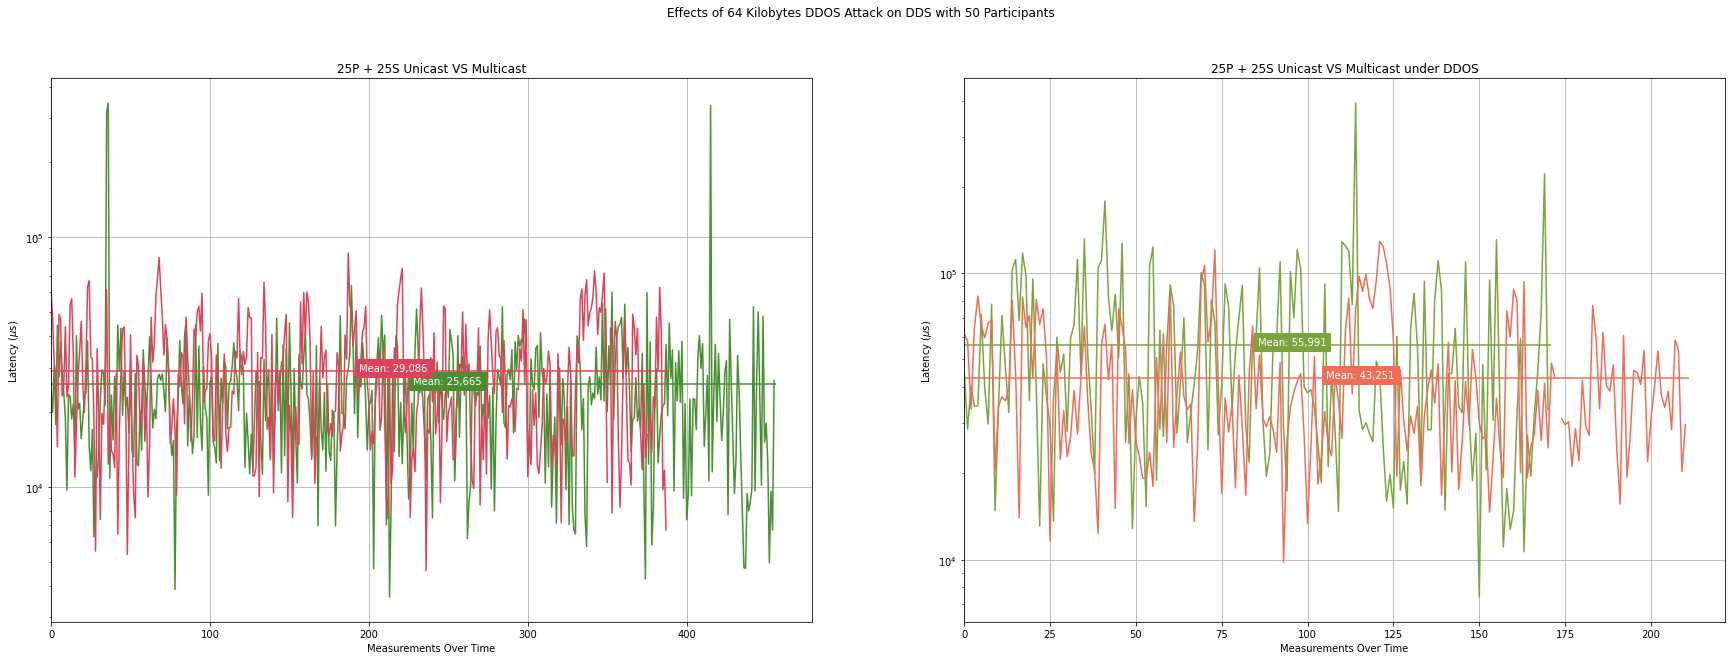

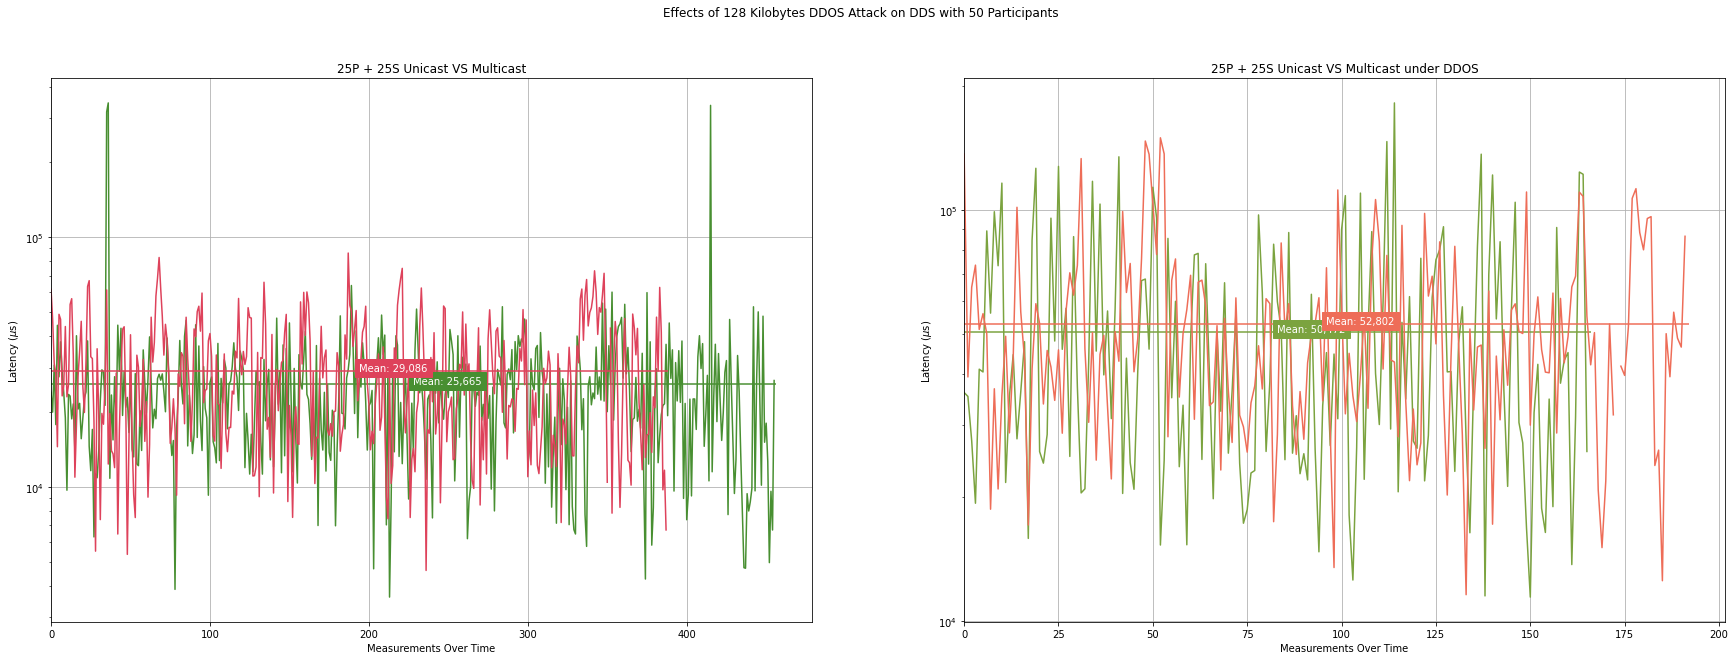

In [8]:
# Start off getting the average files
set_2_lat_avg_files = [file for file in get_files('data/set_2') if 'average_latencies' in file]
set_3_lat_avg_files = [file for file in get_files('data/set_3') if 'average_latencies' in file]

# Get the unicast and multicast files
set_2_u_file = [file for file in set_2_lat_avg_files if 'unicast_2' in file][0]
set_2_m_file = [file for file in set_2_lat_avg_files if 'multicast_2' in file][0]

set_3_300B_u_file = [file for file in set_3_lat_avg_files if 'unicast_2' in file and '300_bytes' in file][0]
set_3_500B_u_file = [file for file in set_3_lat_avg_files if 'unicast_2' in file and '500_bytes' in file][0]
set_3_1KB_u_file = [file for file in set_3_lat_avg_files if 'unicast_2' in file and '1_kilobyte' in file][0]
set_3_16KB_u_file = [file for file in set_3_lat_avg_files if 'unicast_2' in file and '16_kilobyte' in file][0]
set_3_64KB_u_file = [file for file in set_3_lat_avg_files if 'unicast_2' in file and '64_kilobyte' in file][0]
set_3_128KB_u_file = [file for file in set_3_lat_avg_files if 'unicast_2' in file and '128_kilobyte' in file][0]

set_3_300B_m_file = [file for file in set_3_lat_avg_files if 'multicast_2' in file and '300_bytes' in file][0]
set_3_500B_m_file = [file for file in set_3_lat_avg_files if 'multicast_2' in file and '500_bytes' in file][0]
set_3_1KB_m_file = [file for file in set_3_lat_avg_files if 'multicast_2' in file and '1_kilobyte' in file][0]
set_3_16KB_m_file = [file for file in set_3_lat_avg_files if 'multicast_2' in file and '16_kilobyte' in file][0]
set_3_64KB_m_file = [file for file in set_3_lat_avg_files if 'multicast_2' in file and '64_kilobyte' in file][0]
set_3_128KB_m_file = [file for file in set_3_lat_avg_files if 'multicast_2' in file and '128_kilobyte' in file][0]

# Store the files in a dictionary for easier access 
set_2_files = {'unicast': set_2_u_file, 'multicast': set_2_m_file}
set_3_files = {
    '300_unicast': set_3_300B_u_file, 
    '300_multicast': set_3_300B_m_file, 
    '500_unicast': set_3_500B_u_file, 
    '500_multicast': set_3_500B_m_file, 
    '1000_unicast': set_3_1KB_u_file, 
    '1000_multicast': set_3_1KB_m_file,
    '16000_unicast': set_3_16KB_u_file,
    '16000_multicast': set_3_16KB_m_file,
    '64000_unicast': set_3_64KB_u_file,
    '64000_multicast': set_3_64KB_m_file,
    '128000_unicast': set_3_128KB_u_file,
    '128000_multicast': set_3_128KB_m_file
}

plot_ddos_subplot(set_2_files, set_3_files, '300_unicast', '300_multicast', '#7ba33f', '#ee6d58', '300B Attack Unicast', '300B Attack Multicast', '300 Byte')
plot_ddos_subplot(set_2_files, set_3_files, '500_unicast', '500_multicast', '#7ba33f', '#ee6d58', '500B Attack Unicast', '500B Attack Multicast', '500 Byte')
plot_ddos_subplot(set_2_files, set_3_files, '1000_unicast', '1000_multicast', '#7ba33f', '#ee6d58', '1KB Attack Unicast', '1KB Attack Multicast', '1 Kilobyte')
plot_ddos_subplot(set_2_files, set_3_files, '16000_unicast', '16000_multicast', '#7ba33f', '#ee6d58', '16KB Attack Unicast', '16KB Attack Multicast', '16 Kilobytes')
plot_ddos_subplot(set_2_files, set_3_files, '64000_unicast', '64000_multicast', '#7ba33f', '#ee6d58', '64KB Attack Unicast', '64KB Attack Multicast', '64 Kilobytes')
plot_ddos_subplot(set_2_files, set_3_files, '128000_unicast', '128000_multicast', '#7ba33f', '#ee6d58', '128KB Attack Unicast', '128KB Attack Multicast', '128 Kilobytes')

From the above graphs we can see that DDOS attacks definitely show an increase in latency in all cases. We should quantify the difference in performance:

### Performance Difference

In [9]:
columns = ['Test', 'Average Latency for 100B (us)', 'Average DDOS Latency for 100B (us)', 'Latency Difference (%)']
tests = []
avg_latencies = []
raw_avg_latencies = []
avg_ddos_latencies = []
raw_avg_ddos_latencies = []
lat_diffs = []

for i in set_3_files:
    item = set_3_files[i]
    full_test_name = os.path.basename(os.path.dirname(item).split("dos_")[1].replace("_2", "").replace("_", " ").title())
    test = full_test_name.split()[1] + " " + full_test_name.split()[2] + " " + full_test_name.split()[0]
    # test = item.split("_")[0] + " Bytes " + item.split("_")[1].title()
    tests.append(test)
    
    df = pd.read_csv(set_3_files[i])
    mean = df["avg_non_mal_run_latency"].mean()
    raw_avg_ddos_latencies.append(mean)
    mean = "{0:,.0f}".format(mean)
    avg_ddos_latencies.append(mean)
    
    # Get Set 2 test data
    if 'unicast' in item:
        df = pd.read_csv(set_2_files['unicast'])
    else:
        df = pd.read_csv(set_2_files['multicast'])

    mean = df['avg_non_mal_run_latency'].mean()
    raw_avg_latencies.append(mean)
    mean = "{0:,.0f}".format(mean)
    avg_latencies.append(mean)

for i in range(0, len(avg_latencies)):
    previous = float(avg_latencies[i].replace(",", ""))
    current = float(avg_ddos_latencies[i].replace(",", ""))
    percent_change = (abs(current - previous) / previous) * 100.0
    lat_diffs.append("{0:,.0f}".format(percent_change))

plot_table(columns, [tests, avg_latencies, avg_ddos_latencies, lat_diffs])

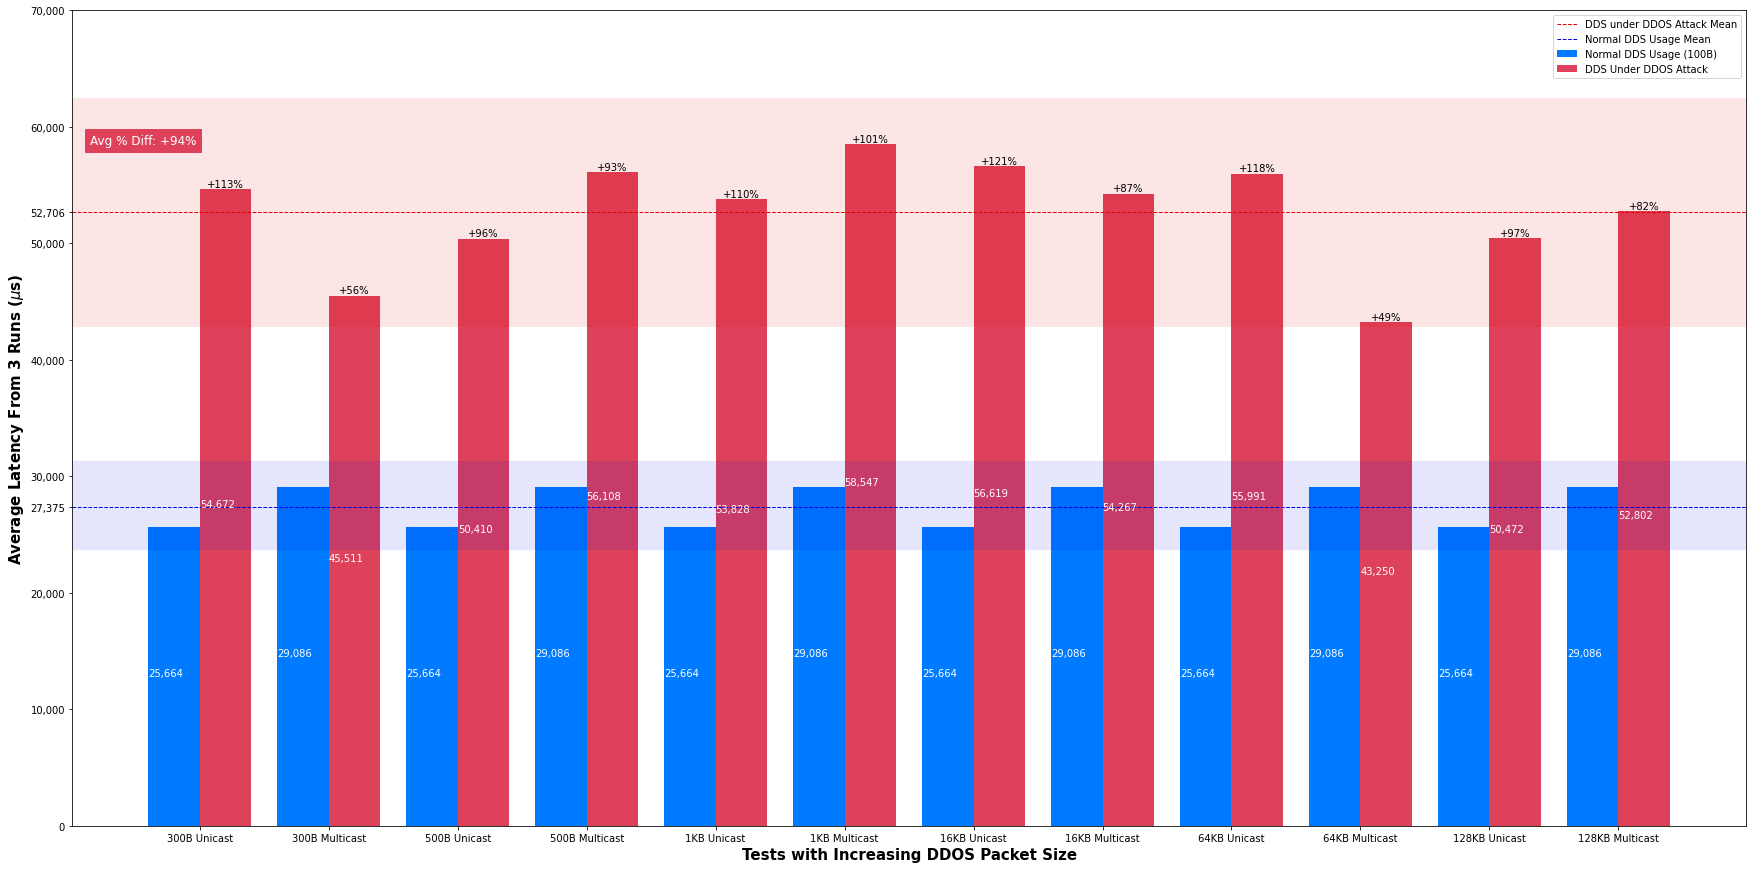

In [10]:
fig, ax = plt.subplots(figsize=(30, 15))

# Create new dataframe from above table data
df = pd.DataFrame({
    'tests': tests,
    'avg_latencies': raw_avg_latencies,
    'avg_ddos_latencies': raw_avg_ddos_latencies,
    'lat_diffs': lat_diffs
})

# Get mean of avg_latencies and avg_ddos_latencies
means = {}
means['avg_latencies'] = df['avg_latencies'].mean()
means['avg_ddos_latencies'] = df['avg_ddos_latencies'].mean()

stds = {}
stds['avg_latencies'] = df['avg_latencies'].std()
stds['avg_ddos_latencies'] = df['avg_ddos_latencies'].std()

short_test_names = []
for test in df['tests']:
    if 'Bytes' in test:
        short_test_names.append(test.replace(" Bytes", "B"))
    elif 'Kilobytes' in test:
        short_test_names.append(test.replace(' Kilobytes', 'KB'))
    elif 'Kilobyte ': 
        short_test_names.append(test.replace(' Kilobyte ', 'KB '))

width = 0.4
normal_bars = ax.bar(df.index - width / 2, df['avg_latencies'], width, color='#007bff', label="Normal DDS Usage (100B)")
ddos_bars = ax.bar(df.index + width / 2, df['avg_ddos_latencies'], width, color='#de425b', label="DDS Under DDOS Attack")

percent_diffs = []
percent_diffs_raw = []
for i in range(0, len(df)):
    before = df['avg_latencies'][i]
    after = df['avg_ddos_latencies'][i]
    percent_diffs_raw.append((abs(after - before) / before) * 100.0)
    percent_diffs.append("+" + "{0:,.0f}".format((abs(after - before) / before) * 100.0) + "%")

df['percent_diffs'] = percent_diffs_raw

ax.bar_label(ddos_bars, percent_diffs)

# Add labels to each point
for i in range(0, len(df.index)):
    test = test.title()
    
    x = (i - width)
    y = int(df['avg_latencies'][i] / 2)
    text = "{0:,.0f}".format(int(df['avg_latencies'][i]))
    ax.text(x, y, text, color='white', fontsize=10, fontweight=500)

    x = int(i + width)
    y = int(df['avg_ddos_latencies'][i] / 2)
    text = "{0:,.0f}".format(int(df['avg_ddos_latencies'][i]))
    ax.text(x, y, text, color='white', fontsize=10, fontweight=500)
    
# Set y label, x label, and remove x ticks
ax.set_ylabel("Average Latency From 3 Runs ($\mu$s)", fontweight='bold', fontsize=15)
ax.set_xlabel("Tests with Increasing DDOS Packet Size", fontweight='bold', fontsize=15)
ax.set_xticks(np.arange(len(df['tests'])), short_test_names)

# Plot red range shade
ax.axhline(means['avg_ddos_latencies'], 0, 1, color=(0.9, 0, 0,.1), linewidth=(stds['avg_ddos_latencies'] / 20))
ax.axhline(means['avg_ddos_latencies'], 0, 1, color=(0.9, 0, 0, 1), linewidth=1, label="DDS under DDOS Attack Mean", ls="--")
# Plot blue range shade
ax.axhline(27500, 0, 1, color=(0, 0, 0.9, 0.1), linewidth=(stds['avg_latencies'] / 20))
ax.axhline(means['avg_latencies'], 0, 1, color=(0, 0, 0.9, 1), linewidth=1, label="Normal DDS Usage Mean", ls="--")

yticks = (tuple(ax.get_yticks()) + (means['avg_ddos_latencies'], means['avg_latencies']))
_ = ax.set_yticks(tuple(yticks))

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, p: format(int(y), ',')))
_ = ax.legend()

_ = ax.text(-0.85, df['avg_ddos_latencies'].max(), "Avg % Diff: +{0:,.0f}%".format(df['percent_diffs'].mean()), color='white', backgroundcolor='#de425b', fontsize=12)

## Set 2 50 Participant (0 Malicious, 100 Bytes) Latency VS Set 3 100 Participant (50 Malicious, 500 Bytes) Latency

(5000.0, 170000.0)

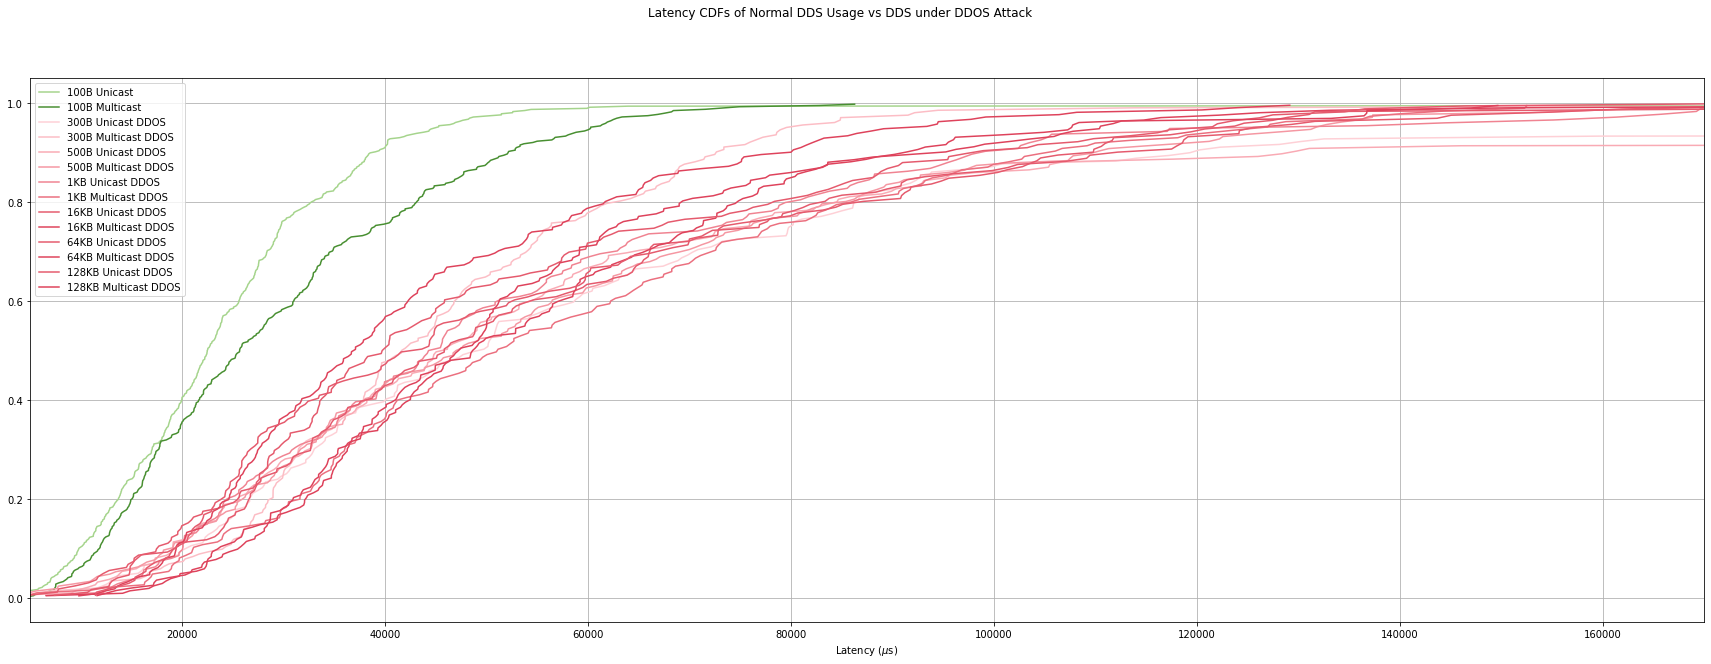

In [12]:
def plot_cdf(ax, df, colour, label):
    """
      Plot a CDF for df onto Axis ax.
    
      Parameters:
        ax (Axis): Axis to plot on.
        df (DataFrame): DataFrame to produce CDF of.
        colour (string): Colour of line.
        label (string): Label of line.
    
      Returns:
        None 
    """
    cdf = df.value_counts().sort_index().cumsum() / df.shape[0]
    cdf.plot(ax = ax, c = colour, label=label)
    
fig, ax = plt.subplots(figsize=(30, 10))
fig.suptitle("Latency CDFs of Normal DDS Usage vs DDS under DDOS Attack")
for i in set_2_files:
  if 'unicast' in set_2_files[i]:
    plot_cdf(ax, pd.read_csv(set_2_files[i])['avg_non_mal_run_latency'], '#a5d48c', '100B Unicast')
  else:
    plot_cdf(ax, pd.read_csv(set_2_files[i])['avg_non_mal_run_latency'], '#488f31', '100B Multicast')

for i in set_3_files:
    if '300_bytes' in set_3_files[i]:
        if 'unicast' in set_3_files[i]:
          plot_cdf(ax, pd.read_csv(set_3_files[i])['avg_non_mal_run_latency'], '#fed0d6', '300B Unicast DDOS')
        else:
          plot_cdf(ax, pd.read_csv(set_3_files[i])['avg_non_mal_run_latency'], '#fcbdc5', '300B Multicast DDOS')
    elif '500_bytes' in set_3_files[i]:
        if 'unicast' in set_3_files[i]:
          plot_cdf(ax, pd.read_csv(set_3_files[i])['avg_non_mal_run_latency'], '#f9aab4', '500B Unicast DDOS')
        else:
          plot_cdf(ax, pd.read_csv(set_3_files[i])['avg_non_mal_run_latency'], '#f597a2', '500B Multicast DDOS')
    elif '1_kilobyte' in set_3_files[i]:
        if 'unicast' in set_3_files[i]:
          plot_cdf(ax, pd.read_csv(set_3_files[i])['avg_non_mal_run_latency'], '#f08391', '1KB Unicast DDOS')
        else:
          plot_cdf(ax, pd.read_csv(set_3_files[i])['avg_non_mal_run_latency'], '#eb6f7f', '1KB Multicast DDOS')
    elif '16_kilobytes' in set_3_files[i]:
        if 'unicast' in set_3_files[i]:
          plot_cdf(ax, pd.read_csv(set_3_files[i])['avg_non_mal_run_latency'], '#e55a6d', '16KB Unicast DDOS')
        else:
          plot_cdf(ax, pd.read_csv(set_3_files[i])['avg_non_mal_run_latency'], '#de425b', '16KB Multicast DDOS')
    elif '64_kilobytes' in set_3_files[i]:
        if 'unicast' in set_3_files[i]:
          plot_cdf(ax, pd.read_csv(set_3_files[i])['avg_non_mal_run_latency'], '#e55a6d', '64KB Unicast DDOS')
        else:
          plot_cdf(ax, pd.read_csv(set_3_files[i])['avg_non_mal_run_latency'], '#de425b', '64KB Multicast DDOS')
    elif '128_kilobytes' in set_3_files[i]:
        if 'unicast' in set_3_files[i]:
          plot_cdf(ax, pd.read_csv(set_3_files[i])['avg_non_mal_run_latency'], '#e55a6d', '128KB Unicast DDOS')
        else:
          plot_cdf(ax, pd.read_csv(set_3_files[i])['avg_non_mal_run_latency'], '#de425b', '128KB Multicast DDOS')
          

ax.grid()
ax.legend()
ax.set_xlabel("Latency ($\mu$s)")
ax.set_xlim(xmin=5000, xmax=170000)

(10000.0, 120000.0)

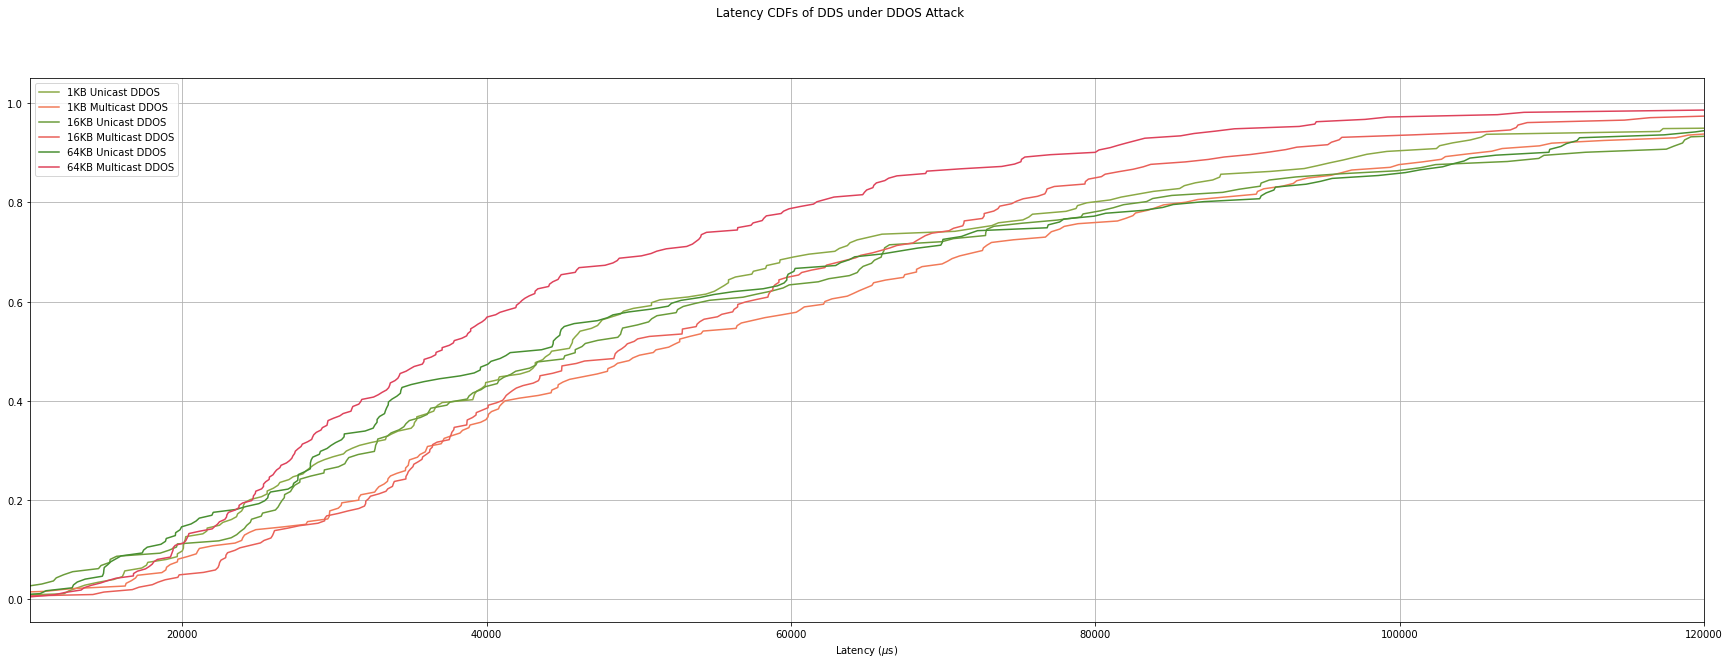

In [6]:
fig, ax = plt.subplots(figsize=(30, 10))
fig.suptitle("Latency CDFs of DDS under DDOS Attack")

for i in set_3_files:
    # if '300_bytes' in set_3_files[i]:
    #     if 'unicast' in set_3_files[i]:
    #       plot_cdf(ax, pd.read_csv(set_3_files[i])['avg_non_mal_run_latency'], '#c7c364', '300B Unicast DDOS')
    #     else:
    #       plot_cdf(ax, pd.read_csv(set_3_files[i])['avg_non_mal_run_latency'], '#fbad67', '300B Multicast DDOS')
    # elif '500_bytes' in set_3_files[i]:
    #     if 'unicast' in set_3_files[i]:
    #       plot_cdf(ax, pd.read_csv(set_3_files[i])['avg_non_mal_run_latency'], '#a9b653', '500B Unicast DDOS')
    #     else:
    #       plot_cdf(ax, pd.read_csv(set_3_files[i])['avg_non_mal_run_latency'], '#f7945d', '500B Multicast DDOS')
    if '1_kilobyte' in set_3_files[i]:
        if 'unicast' in set_3_files[i]:
          plot_cdf(ax, pd.read_csv(set_3_files[i])['avg_non_mal_run_latency'], '#8ba945', '1KB Unicast DDOS')
        else:
          plot_cdf(ax, pd.read_csv(set_3_files[i])['avg_non_mal_run_latency'], '#f17a58', '1KB Multicast DDOS')
    elif '16_kilobytes' in set_3_files[i]:
        if 'unicast' in set_3_files[i]:
          plot_cdf(ax, pd.read_csv(set_3_files[i])['avg_non_mal_run_latency'], '#6b9c3a', '16KB Unicast DDOS')
        else:
          plot_cdf(ax, pd.read_csv(set_3_files[i])['avg_non_mal_run_latency'], '#e95f58', '16KB Multicast DDOS')
    elif '64_kilobytes' in set_3_files[i]:
        if 'unicast' in set_3_files[i]:
          plot_cdf(ax, pd.read_csv(set_3_files[i])['avg_non_mal_run_latency'], '#488f31', '64KB Unicast DDOS')
        else:
          plot_cdf(ax, pd.read_csv(set_3_files[i])['avg_non_mal_run_latency'], '#de425b', '64KB Multicast DDOS')
          

ax.grid()
ax.legend()
ax.set_xlabel("Latency ($\mu$s)")
ax.set_xlim(xmin=10000, xmax=120000)

(0.0, 90.0)

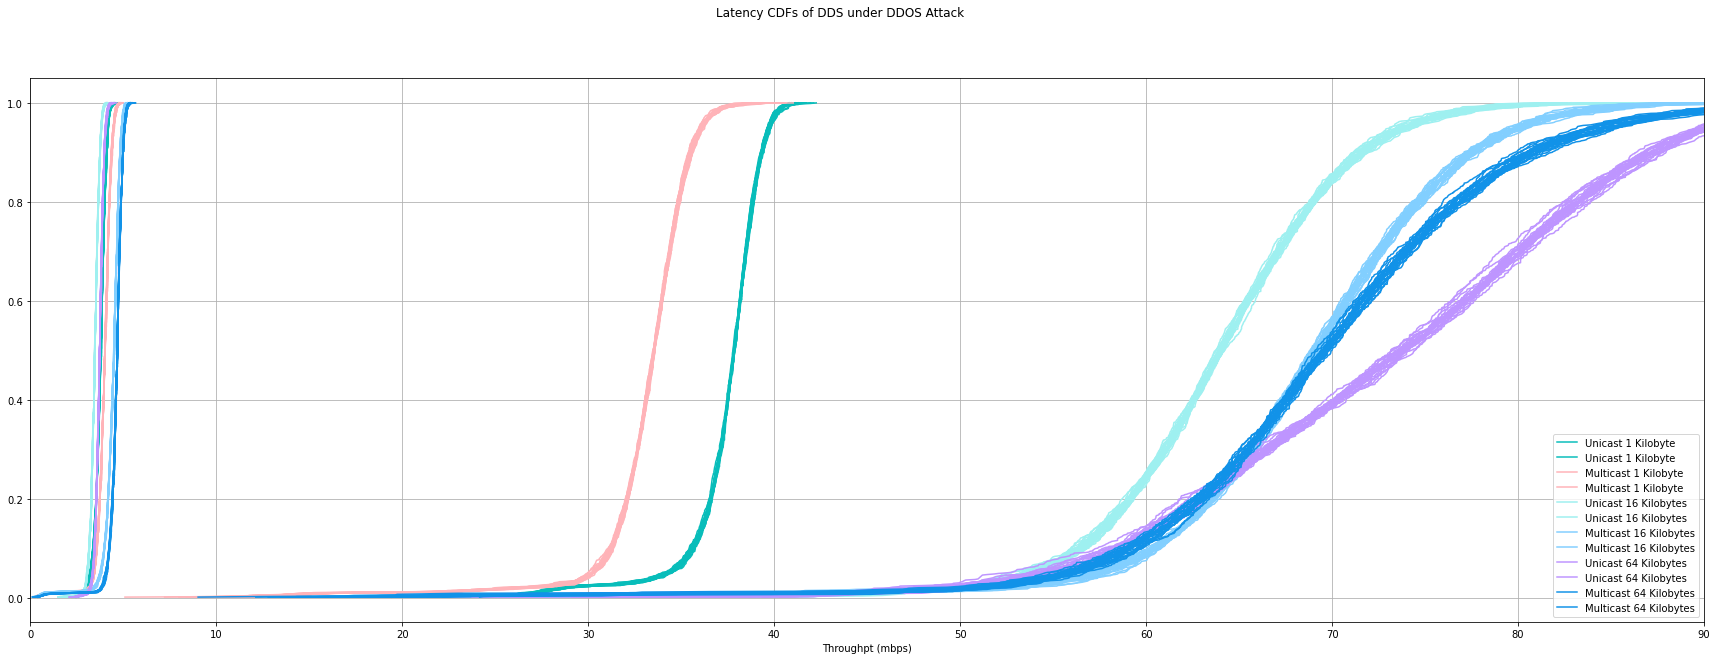

In [7]:
def plot_throughput_cdfs(files, ax, colour):
    """
      Plot CDFs of multiple throughput average files.
    
      Parameters:
        files ( [string] ): Array of files containing throughput data to plot.
        ax (Axis): Axis to plot data on.
    
      Returns:
        None 
    """
    for file in files:
      if 'sub_0_' in file:
        label = get_test_name(file, True)
      else:
        label = ""
      plot_cdf(ax, pd.read_csv(file)["avg_run_throughput"], colour, label)

def get_test_name(file, formatted):
    """
      Get the name of the test from the filename.
    
      Parameters:
        file (string): path of the file.
    
      Returns:
        test_name (string): name of the test 
    """
    if formatted:
      test_name = os.path.basename(os.path.dirname(file))
      test_name = test_name.split("dos_")[1].replace("_2_", " ").replace("_", " ").title()
      return test_name
    else:
      return os.path.basename(os.path.dirname(file))

s3_tp_files = [file for file in get_files('data/set_3') if 'average_throughputs' in file]

fig, ax = plt.subplots(figsize=(30, 10))
fig.suptitle("Latency CDFs of DDS under DDOS Attack")

ucast_colours1 = ['#6b9c3a', '#8ba945', '#a9b653', '#c7c364', '#e3d076', '#ffde8a', '#fdc676', '#fbad67', '#f7945d', '#f17a58', '#e95f58']
ucast_colours1.reverse()
mcast_colours1 = ['#525e93', '#7471aa', '#9685c0', '#b89ad6', '#dbafeb', '#ffc5ff', '#ffb4eb', '#ffa3d0', '#ff94b0', '#ff888c', '#ff8266']
mcast_colours1.reverse()

greens = ['#488f31', '#549c3b', '#60aa45', '#6db850', '#79c65a', '#86d465', '#93e26f', '#a0f07a', '#adff85']
reds = ['#de425b', '#e4536b', '#ea627a', '#ee718a', '#f38099', '#f68fa7', '#fa9db5', '#fcabc2', '#ffb9cf']

ucast_colours2 = ['#491d8b', '#6929c4', '#8a3ffc', '#a56eff', '#be95ff', '#d4bbff', '#9ef0f0', '#3ddbd9', '#08bdba', '#009d9a', '#007d79', '#005d5d', '#004144']
ucast_colours2.reverse()
mcast_colours2 = ['#750e13', '#a2191f', '#da1e28', '#fa4d56', '#ff8389', '#ffb3b8', '#bae6ff', '#82cfff', '#33b1ff', '#1192e8', '#0072c3', '#00539a', '#003a6d']


for i in set_3_files:
  pre_test_files = [file for file in s3_tp_files if get_test_name(set_3_files[i], False) in file]
  test_files = [file for file in pre_test_files if '300' not in file and '500' not in file]
  index = list(set_3_files.keys()).index(i)
  if 'unicast' in get_test_name(set_3_files[i], False):
    colour = ucast_colours2[index]
  else:
    colour = mcast_colours2[index]
  plot_throughput_cdfs(test_files, ax, colour)

ax.grid()
ax.legend()
ax.set_xlabel("Throughpt (mbps)")
ax.set_xlim(xmin=0, xmax=90)